<a href="https://colab.research.google.com/github/abirhazra/Reinforcement-Learning/blob/main/networkx_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as plt

#Generate random graph

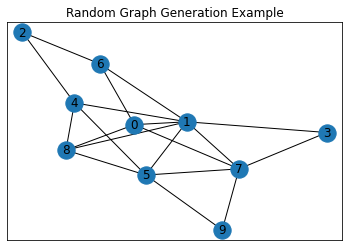

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random


def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g


n = 10
p = 0.4
G = ER(n, p)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.title("Random Graph Generation Example")
plt.show()

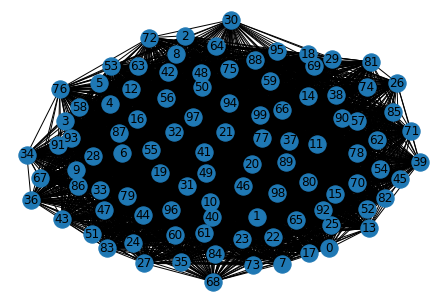

In [28]:
import networkx as nx 
  
#importing the matplotlib library for plotting the graph 
import matplotlib.pyplot as plt 
  
G= nx.erdos_renyi_graph(100,0.7) 
nx.draw(G, with_labels=True) 
plt.show() 

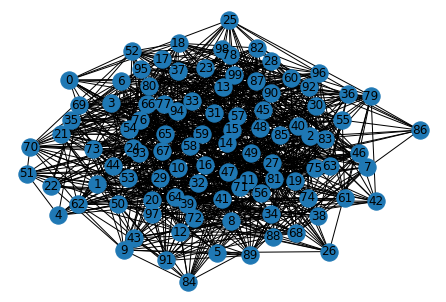

In [29]:
I= nx.erdos_renyi_graph(100,.2) 
nx.draw(I, with_labels=True) 
plt.show() 

In [37]:
points_list = [(0,1),(1,5),(5,6),(5,4),(1,2),(2,3),(2,7),(6,1),(7,1),(7,4)]

{0: Text(-0.13781809854463462, 0.6569162473348374, '0'),
 1: Text(0.0980739497131629, 0.0762624051164647, '1'),
 2: Text(-0.48999086697447847, -0.2483540187593788, '2'),
 3: Text(-1.0, -0.5057259238962288, '3'),
 4: Text(0.36986978793780206, 0.3007644459747254, '4'),
 5: Text(0.6590169242554296, 0.09681770985076762, '5'),
 6: Text(0.58947908796776, -0.2642528796777183, '6'),
 7: Text(-0.08863078435504129, -0.11242798594346924, '7')}

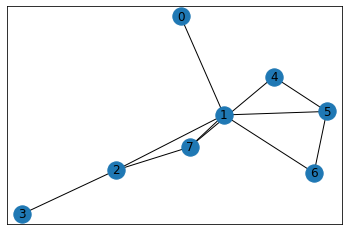

In [50]:
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)

In [51]:
MATRIX_SIZE = 8

In [52]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
R

matrix([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [53]:
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [54]:
goal = 7
for point in points_list:
  print(point)
  if point[1]==goal:
    R[point] = 100
  else:
    R[point] = 0

  if point[0] == goal:
    R[point[::-1]] = 100
  else:
    R[point[::-1]] = 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
(6, 1)
(7, 1)
(7, 4)


In [48]:
R[goal,goal] = 100

In [49]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,   0., 100.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,   0.,  -1.,   0.,  -1.,  -1., 100.]])

In [56]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [60]:
gamma = 0.8
initial_state=np.random.randint(0,7)
initial_state

2

In [61]:
def available_actions(state):
  current_state_row=R[state,]
  av_act = np.where(current_state_row>=0)[1]
  return av_act

available_act = available_actions(initial_state)

In [62]:
def sample_next_action(available_act_range):
  next_action = int (np.random.choice(available_act))
  return next_action

action = sample_next_action(available_act)

In [65]:
def update (current_state, action, gamme):
  max_index = np.where(Q[action,]== np.max(Q[action,]))[1]

  if max_index.shape[0]>1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = Q[action,max_index]
  Q[current_state,action] = R[current_state,action] + gamma * max_value
  print('max_value', R[current_state,action]+gamma*max_value)

  if(np.max(Q)>0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return(0)

update(initial_state, action, gamma)



max_value 0.0


0